# Edition, visualisation, traversal
## Boolean automata


In [2]:
import awalipy # If import fails, check that 
               # Python version used as Jupyter
               # kernel matches the one
               # Awalipy was compiled with.

[Warning] The python module awalipy relies on compilation executed "on-the-fly" depending on the context (type of weights, of labels, etc.). As a result, the very first call to a given function in a given context may take up to one minute. 


(The above warning is displayed every time awalipy is imported.)

## Creating an automaton

Alphabets we use are Python `str`
- each `char` of the `str` is a letter the alphabet
- order does not matter (`"abc"` and `"bac"` represent the same alphabet)

In [3]:
alph1 = "abc"  # represents {a,b,c}
alph2 = "01"   # represents {0,1}

An **automaton** is built from an alphabet

In [4]:
A = awalipy.Automaton(alph1)
# or directly  `awalipy.Automaton("abc")`

`A` is an automaton with no states and no transitions over the alphabet {a,b,c}

---
Adding states

By default the displayed name of the state is given by its index: the first state is named `"s0"`, the second `"s1"`, etc.

In [5]:
stt_0 = A.add_state()
stt_1 = A.add_state()

---
Adding transitions

In [6]:
tr_0 = A.set_transition(stt_0,stt_1,'a')
tr_1 = A.set_transition(stt_1,stt_0,'b')
tr_2 = A.set_transition(stt_0,stt_0,'b')

<hr>
There is no Python class for transitions or states. We manipulate only their identifiers.

In [7]:
print (stt_0)
print (tr_2)

0
2


---
Making states initial or final

In [8]:
A.set_initial(stt_0)
A.set_final(stt_1)

# Displaying an automaton

Displaying an automaton graphically, using dot for state placement.<br>
(Works well for small automata only.)

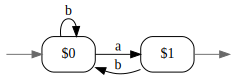

In [9]:
A.display()

---
Displayin an automaton in text format.

In [10]:
A

Automaton (static context: lal_char_b)
Weightset: B	Alphabet: abc	Epsilon-transitions: Disallowed
- States:{	0(i)	1(f)	}
- Transitions:{	0-a->1	1-b->0	0-b->0		}

NB: the mention `(i)` following a state means that the state is *initial*.  Similarly, `(f)` means *final* and `(i,f)` means *initial and final*.

## Epsilon transitions
By default, automata do not allow epsilon transitions.  
Moreover, automata with/without epsilon transitions are not represented by the same data structure. Allowing epsilon transition hence provokes a complete copy of the automaton.

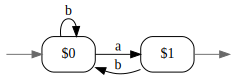

In [11]:
Ae = A.allow_eps_transition()
Ae.display()

---
Adding an epsilon transition using the specific function.

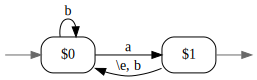

In [12]:
tr_3 = Ae.set_eps_transition(stt_1,stt_0)
Ae.display()

Epsilon transition is represented by the string `"\e"`.

(*NB: the `'\'` must be escaped by a preceding `'\'`*)

---
Adding an epsilon-transition using the general function.

In [13]:
Ae.set_transition(stt_1,stt_1,"\\e")

6

For convenience we also allow `""` as input to mean epsilon.

In [14]:
Ae.set_transition(stt_0,stt_0,"")

7

---
Resulting automaton:

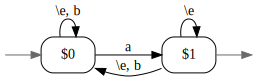

In [15]:
Ae.display()

## Deleting edges and states

Let us consider the automaton `A`.

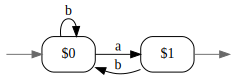

In [16]:
A.display()

---
First we add a bunch of states and transitions

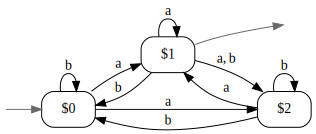

In [17]:
stt_2 = A.add_state()
tr_3 = A.set_transition(stt_1,stt_1,'a')
# Not recording ids of transitions any further
A.set_transition(stt_2,stt_2,'b')
A.set_transition(stt_0,stt_2,'a')
A.set_transition(stt_2,stt_0,'b')
A.set_transition(stt_1,stt_2,'b')
A.set_transition(stt_1,stt_2,'a')
A.set_transition(stt_2,stt_1,'a')
A.display()

---
Deleting a transition by id

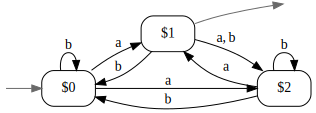

In [18]:
A.del_transition(tr_3) # tr_3 is the transition: s2 --a--> s2
A.display()

---
Deleting a transition by triplet (origin, destination, label)  

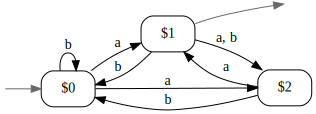

In [19]:
A.del_transition(stt_2,stt_2,'b')
A.display()

---
Deleting all transitions from a state to another (order matters).

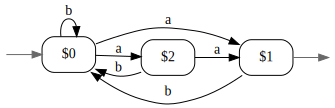

In [20]:
A.del_transition(stt_1,stt_2)
A.display()

---
Deleting a state (and all its outgoing and incoming transitions) 

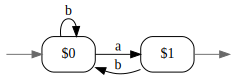

In [21]:
A.del_state(stt_2)
A.display()

## Loading & saving automata

Saving an automaton to file.  The format used is JavaScript Object Notation (JSON) hence the extension ".json" .

In [22]:
A.save("fibo.json")

In [23]:
# This created a new file on the disk called fibo.json in the current directory

---
Loading an automaton.

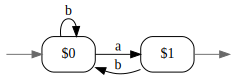

In [24]:
B = awalipy.load("fibo.json")
B.display()

---
A few example are given as part of the library.  The examples are listed by the following function.

In [25]:
examples_dict = awalipy.list_examples()
for kind in ["automata","ratexps"]:
    print("======== {} ==========".format(kind))
    for name in examples_dict[kind]:
        print("- {}\t{}".format(name, examples_dict[kind][name]))
    print ("")

======== automata ==========
- a1	NFA that accepts words with at least one factor 'ab'
- astar-bstar	NFA with epsilon transition which recognizes words in 'a*b*'
- b1	Z-FA that counts the number of 'b' in words of {a,b}*
- binary	Z-FA that converts words of {0,1}^* into their binary values
- binary-int	Z-FA whose labels are integers and that converts words of {0,1}^* into their binary values
- c1	Z-FA that converts words of {a,b}^* into their binary values
- d1	Z-FA computes the difference between the numbers of 'a' and 'b'
- e1	Q-FA that converts words of {a,b}^* into their binary values after the radix point
- evena	DFA which recognizes words with an even number of 'a'
- fibotdc-lr	Sequential transducer which tries to replace 'abb' by 'baa'
- flipper	Transducer that mimics a flipper game
- gray	Gray code increment
- heapmodel	Z-max-plus automaton, heap model with 2 pieces
- lamplighter	Group automaton which realizes the Lamplighter group
- minab	Z-min-plus-automaton which computes th

---
Example automata can be loaded with the function `load` with their name

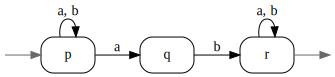

In [26]:
C = awalipy.load("a1")
C.display()

## A few factories


`make_cerny(n)` returns an `n`-states DFA whose smallest synchronising word is of length `(n-1)**2`. This automaton attains the upper bound for the Cerny conjecture.

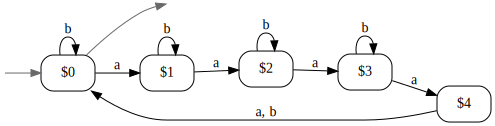

In [27]:
awalipy.make_cerny(5).display()

---
`make_divkbaseb(k,b)` returns an automaton accepting integers divisible by `k`, written in base `b`.

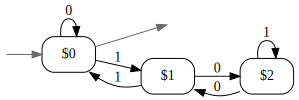

In [28]:
awalipy.make_divkbaseb(3,2).display()

---
`make_ladybird(n)` returns an automaton with `n`-states, whose equivalent minimal DFA has `2**n` states.

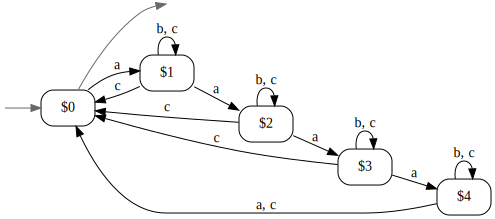

In [29]:
awalipy.make_ladybird(5).display()

---
See also `make_de_bruijn` ,  `make_double_ring` , `make_witness`

## Generate a random accessible DFA

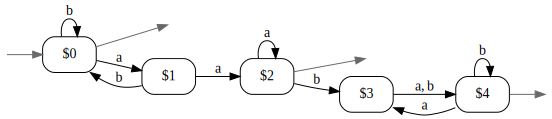

In [30]:
awalipy.make_random_DFA(5,"ab").display()

## Access and browsing

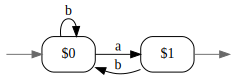

In [31]:
A.display()

---
Getting the list of states, of transitions.

(It cannot be assumed that the ids of states are `[0,1,...,n]` for some n)

In [32]:
A.states(), A.transitions()

([0, 1], [0, 1, 2])

---
Getting the list of initial states, of final states.

In [33]:
A.initial_states(), A.final_states()

([0], [1])

---
Listing the transitions adjacent to a state.

In [34]:
A.outgoing(stt_1), A.incoming(stt_1)

([1], [0])

---
Listing the transitions from a state to another.

In [35]:
A.outin(stt_0,stt_1)

[0]

---
Getting information from a transition identifier.

In [36]:
# NB: tr_1 is a transition s1 --b--> s0
print (A.src_of(tr_1))   ## Source of transition tr_2
print (A.label_of(tr_1)) ## Label of tr_2
print (A.dst_of(tr_1))   ## Destination of tr_2
print (A.unpack_transition(tr_1)) ## All the above. (Third component 
                                ## is the weight and may be ignored.)

1
b
0
(1, 'b', 'true', 0)


---
List of states reachable from a state in one transition.

In [37]:
A.successors(stt_0), A.successors(stt_0, 'a')

([1, 0], [1])

---
List of states that may reach a state in one transition.

In [38]:
A.predecessors(stt_0), A.predecessors(stt_0, 'a')

([1, 0], [])

## Exercice: breadth-first traversal of **A**

In [39]:
def bf_traversal(A):
    visited = {}
    for i in A.states():
        visited[i] = False

    to_treat = A.initial_states()
    while len(to_treat) > 0 :
        stt = to_treat.pop()
        if not (visited[stt]):
            visited[stt] = True
            out_trs = A.outgoing(stt)
            for tr in out_trs:
                print (A.unpack_transition(tr))
                to_treat.append(A.dst_of(tr))

In [40]:
bf_traversal(A)

(0, 'a', 'true', 1)
(0, 'b', 'true', 0)
(1, 'b', 'true', 0)


In [41]:
bf_traversal(awalipy.make_ladybird(3))

(0, 'a', 'true', 1)
(1, 'b', 'true', 1)
(1, 'c', 'true', 1)
(1, 'c', 'true', 0)
(1, 'a', 'true', 2)
(2, 'b', 'true', 2)
(2, 'c', 'true', 2)
(2, 'c', 'true', 0)
(2, 'a', 'true', 0)
